In [26]:
#@title Importations

import random
import matplotlib.pyplot as plt

In [ ]:
#@title Exercice 0.1

germe_valide = False
while not germe_valide:
    germe = int(input("Entrez le germe aléatoire (entre 1 et 100): "))
    germe_valide = germe >= 1 and germe <= 100

random.seed(germe)

valeurs = []
for i in range(1000):
    valeur = random.randint(-1000, 999)
    valeurs.append(valeur)

In [28]:
#@title Exercice 0.2

def compter_inferieurs(liste_entiers, valeur_maximale):
    nombre_inferieurs = 0
    for valeur in liste_entiers:
        if valeur < valeur_maximale:
            nombre_inferieurs += 1
    return nombre_inferieurs

nombre_valeurs = compter_inferieurs(valeurs, 30)
print(f"Il y a {nombre_valeurs} valeurs en bas de 30")

Il y a 533 valeurs en bas de 30


In [29]:
#@title Exercice 0.3

def separer_liste(originale, positifs, negatifs):
    for valeur in originale:
        if valeur < 0:
            negatifs.append(valeur)
        else:
            positifs.append(valeur)

valeurs_positives = []
valeurs_negatives = []
separer_liste(valeurs, valeurs_positives, valeurs_negatives)

print(f"Il y a {len(valeurs_positives)} valeurs positives et {len(valeurs_negatives)} valeurs négatives.")

Il y a 479 valeurs positives et 521 valeurs négatives.


In [30]:
#@title Exercice 0.4

with open("positives.txt", "w") as fichier_positif:
    for valeur in valeurs_positives:
        print(valeur, file=fichier_positif)

with open("negatives.txt", "w") as fichier_negatifs:
    for valeur in valeurs_negatives:
        print(valeur, file=fichier_negatifs)


In [36]:
#@title Exercice 0.5

def compter_lignes(nom_fichier):
    nb_lignes = 0
    with open(nom_fichier, "r") as fic:
        for ligne in fic:
            nb_lignes += 1
    return nb_lignes

def enlever_doublons(fichier_entiers):
    valeur_retenus = []
    with open(fichier_entiers) as fic:
        for ligne in fic:
            valeur = int(ligne)
            if valeur not in valeur_retenus:
                valeur_retenus.append(valeur)
    
    position_point = fichier_entiers.index(".")
    extension = fichier_entiers[position_point+1:]
    nouveau_nom = fichier_entiers[:position_point] + "_singleton"+ "." + extension

    with open(nouveau_nom, "w") as nouveau_fic:
        for valeur in valeur_retenus:
            print(valeur, file=nouveau_fic)

enlever_doublons("positives.txt")
enlever_doublons("negatives.txt")

print(f"Le fichier positives_singleton.txt contient {compter_lignes("positives_singleton.txt")} lignes.")
print(f"Le fichier negatives_singleton.txt contient {compter_lignes("negatives_singleton.txt")} lignes.")


Le fichier positives_singleton.txt contient 376 lignes.
Le fichier negatives_singleton.txt contient 402 lignes.


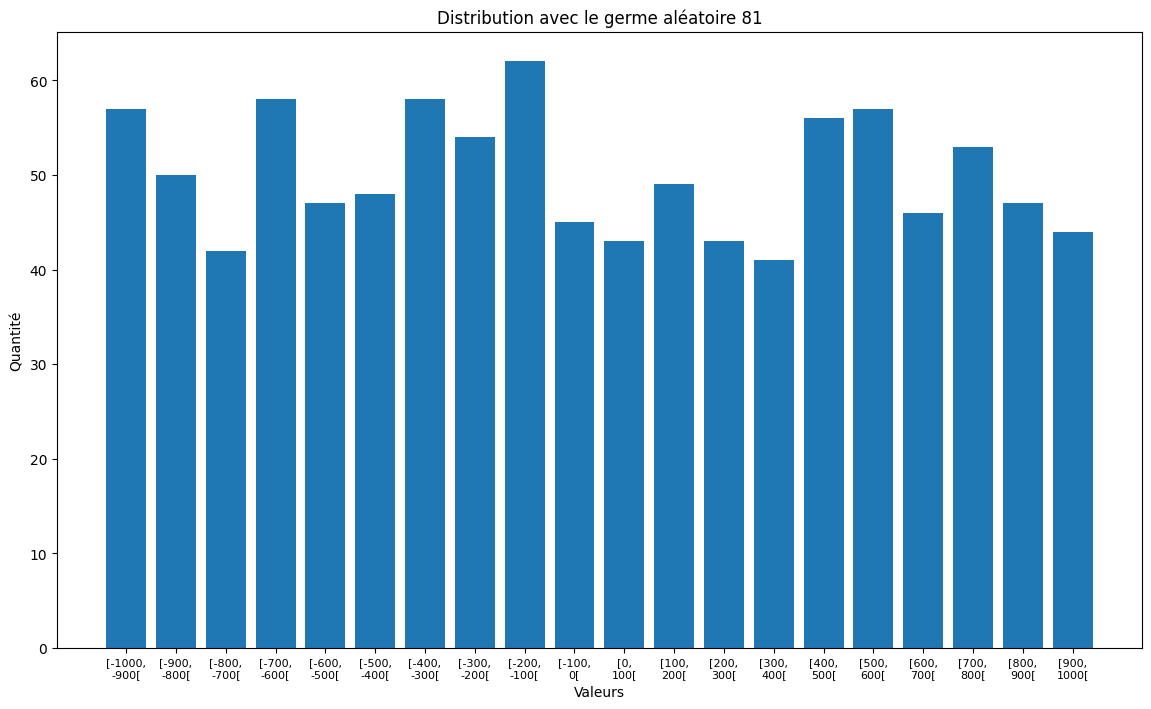

In [ ]:
#@title Exercice 0.6

etiquettes_x = ["[" + str(x) + ",\n" + str(x+100) + "[" for x in range(-1000, 1000, 100)]
quantites = [0] * 20   # Pour partager les valeurs, de -1000 à 1000, par tranche de 100

for valeur in valeurs:
    indice = (valeur + 1000) // 100    # -1000 est à l'indice 0, -901 est à l'indice 0, -900 à l'indice 1... et 900 à 999 à l'indice 19
    quantites[indice] = quantites[indice]  + 1

plt.figure(figsize=(14,8))
plt.title(f"Distribution avec le germe aléatoire {germe}")
plt.bar(etiquettes_x, quantites)
plt.xticks(fontsize=8)
plt.xlabel("Valeurs")
plt.ylabel("Quantité", rotation=90)

plt.show()